# Assignment -> 3
## ------Abalone's age prediction using Regression--------

### importing necessary libraries...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import skew

### (1)&(2). Download dataset and Load the dataset into the tool.

In [ ]:
datafile=pd.read_csv(r"/content/1Churn_Modelling.csv")

In [ ]:
datafile.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### (3). Perform Below Visualizations.
##### ∙ Univariate Analysis
##### ∙ Bi-Variate Analysis
#### ∙ Multi-Variate Analysis

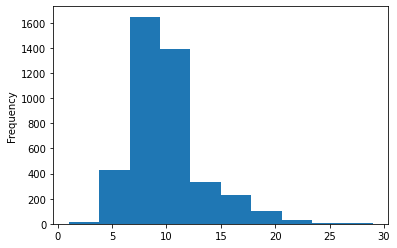

In [ ]:
datafile.Rings.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c821d310>,
      dtype=object)

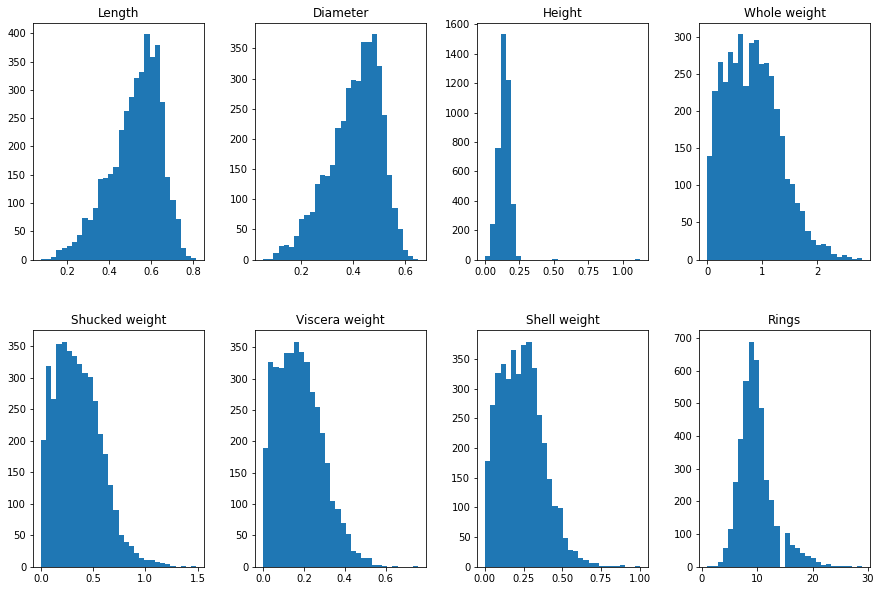

In [ ]:
# univariate-analysis
datafile.hist(figsize=(15,10), grid=False, layout=(2, 4), bins = 30)

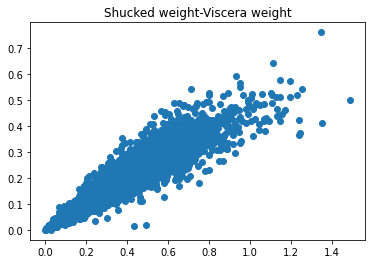

In [ ]:
#Bi-variate analysis
cols = list(datafile.iloc[:,:7].columns)
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        continue
plt.scatter(datafile[cols[i]], df[cols[j]])
plt.title(cols[i]+'-'+cols[j])
plt.show()

In [ ]:
numerical_features = datafile.select_dtypes(include=[np.number]).columns
categorical_features = datafile.select_dtypes(include=[np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


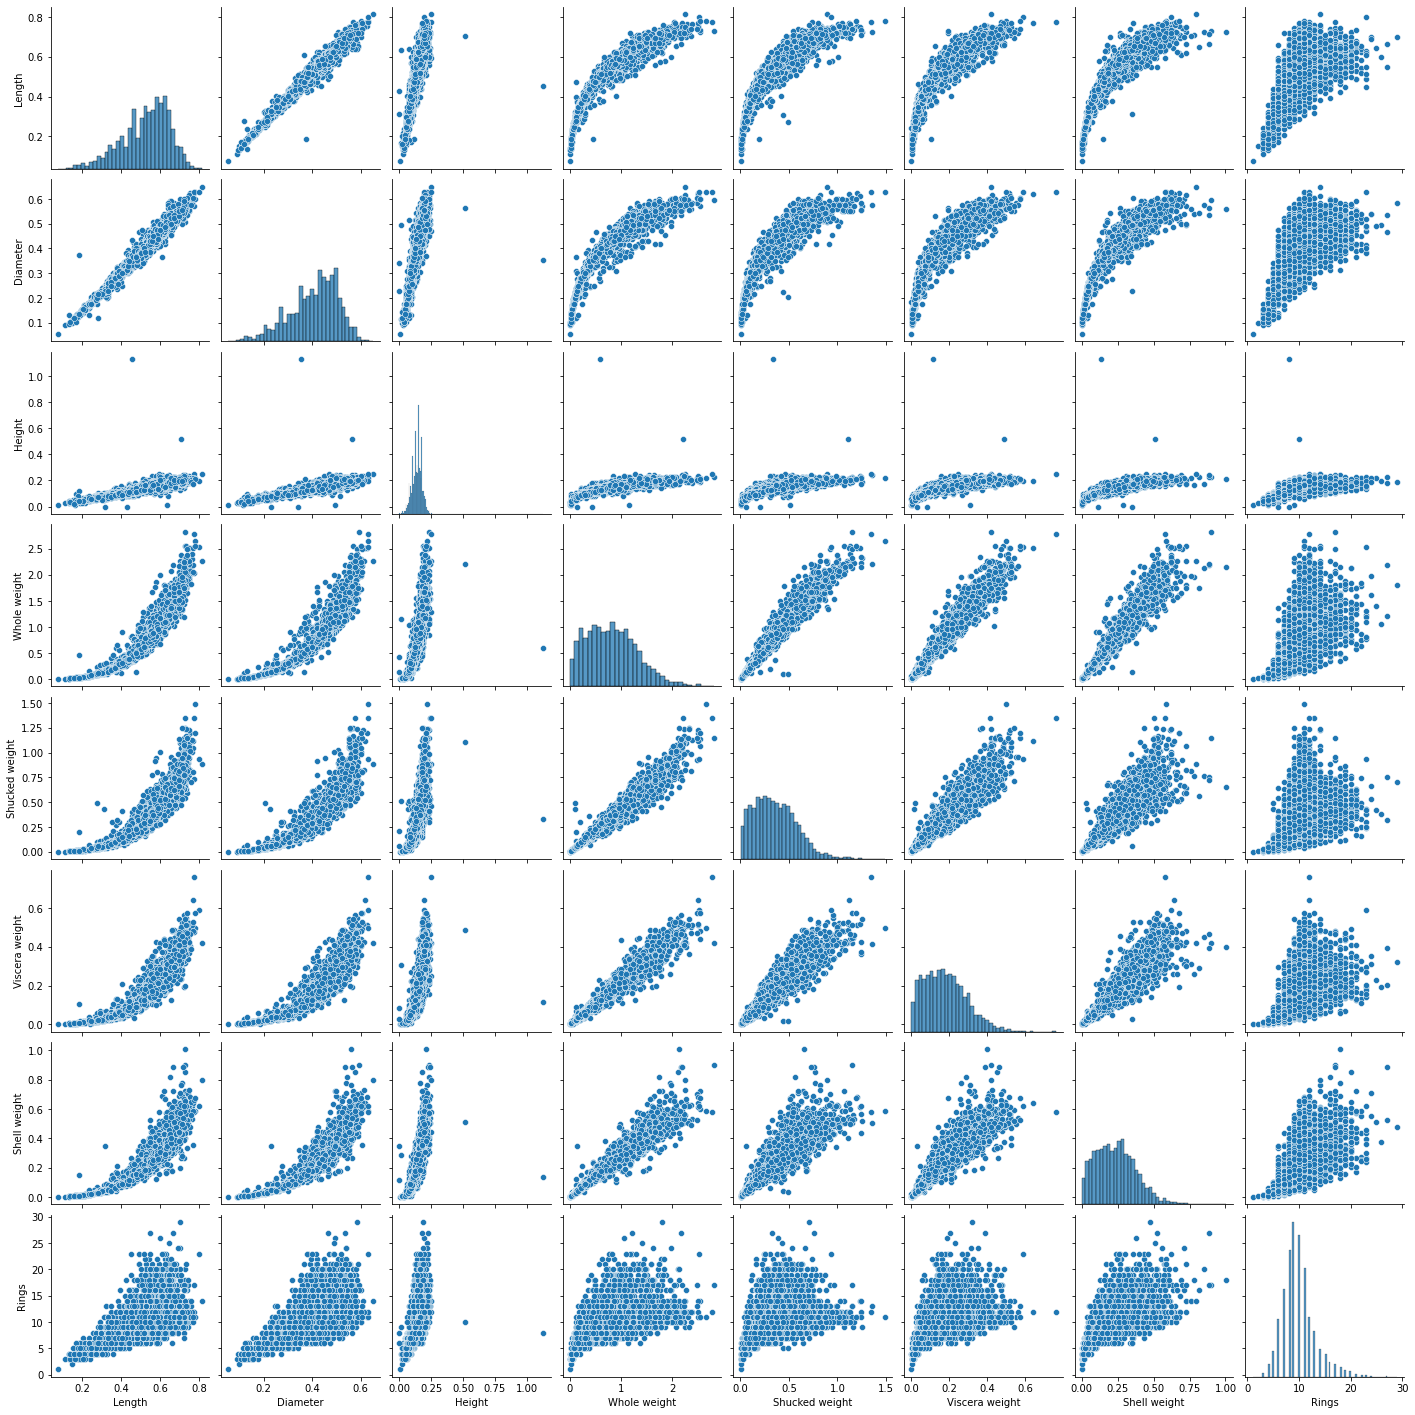

In [ ]:
%matplotlib inline
sns.pairplot(datafile[numerical_features])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


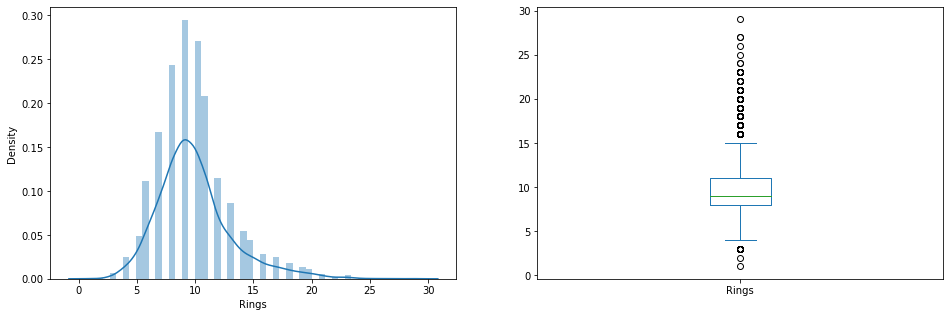

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(datafile['Rings'])

plt.subplot(122)
datafile['Rings'].plot.box(figsize=(16,5))
plt.show()

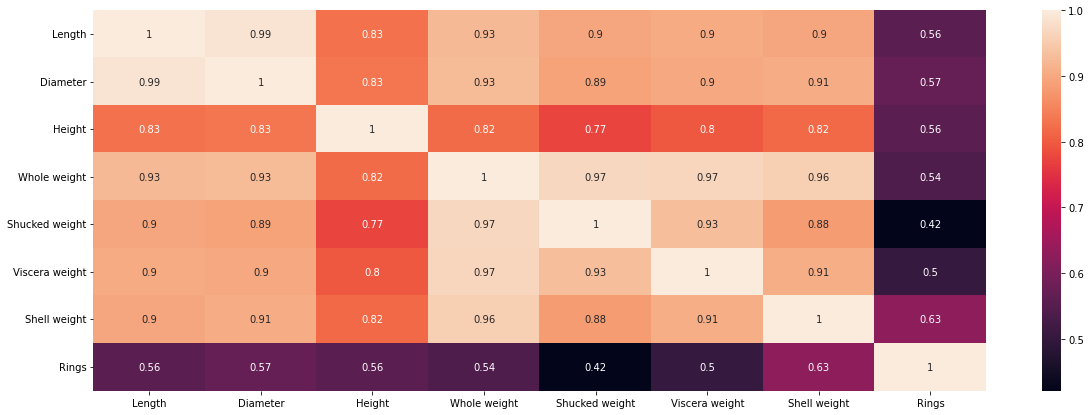

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(datafile[numerical_features].corr(), annot=True)

### (4). Perform descriptive statistics on the dataset.

In [ ]:
# Check the number of rows and columns in the dataframe

datafile.shape

(4177, 9)

In [ ]:
# Check the column-wise info of the dataframe

datafile.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
datafile.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### (5). Check for Missing values and deal with them.

In [ ]:
# Sorting the columns to check the null %

((datafile.isnull().sum()/datafile.index.size)*100).sort_values(ascending=False)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [ ]:
datafile.isnull().sum().sum()
# there is no missing values in the dataset

0

Text(0, 0.5, 'Column Name')

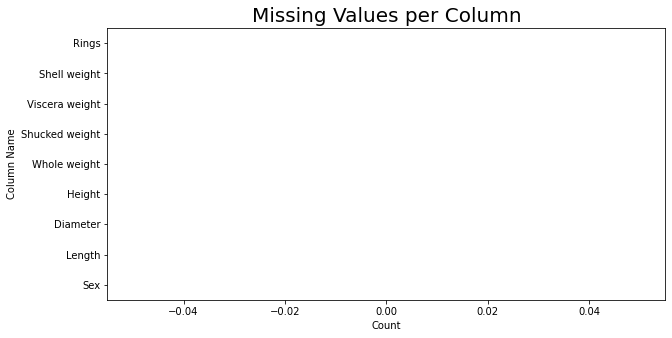

In [ ]:
#create plot
plt.figure(figsize = [10, 5])
plt.title('Missing Values per Column', size = 20)
na_counts = datafile.isna().sum().sort_values(ascending = True)

na_counts.plot.barh(x = na_counts.values, y = na_counts.index);
plt.xlabel('Count', size = 10)
plt.ylabel('Column Name', size = 10)

### (6). Find the outliers and replace them outliers

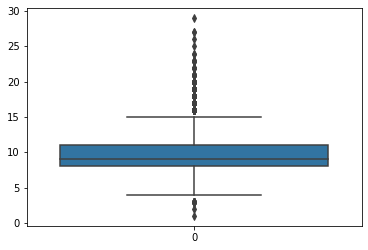

In [ ]:
#no missing values
sns.boxplot(data=datafile['Rings'])

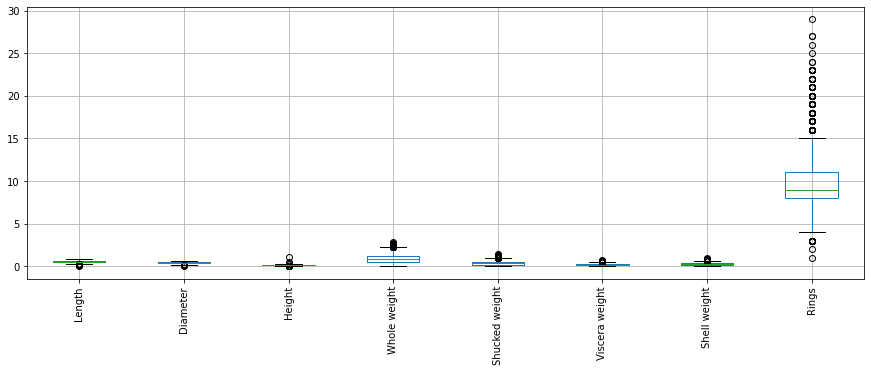

In [ ]:
datafile.boxplot( rot = 90, figsize=(15,5))

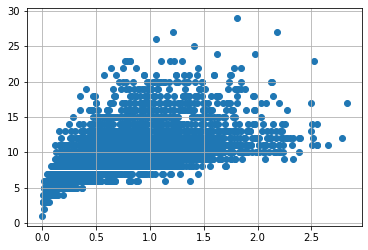

In [ ]:
var = 'Whole weight'
plt.scatter(x = datafile[var], y = datafile['Rings'],)
plt.grid(True)

In [ ]:
datafile.drop(datafile[(datafile['Whole weight']>= 2.5) & (datafile['Rings'] < 25)].index, inplace=True)
datafile.drop(datafile[(datafile['Whole weight']<2.5) & (datafile['Rings'] > 25)].index, inplace=True)

### (7). Check for Categorical columns and perform encoding.

In [ ]:
categorical_features

Index(['Sex'], dtype='object')

In [ ]:
skew_values = skew(datafile[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.167866
7,Rings,1.016494
4,Shucked weight,0.642633
6,Shell weight,0.568604
5,Viscera weight,0.530536
3,Whole weight,0.462174
1,Diameter,-0.624074
0,Length,-0.652059


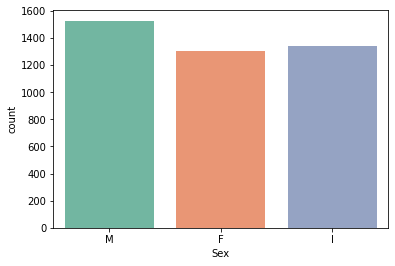

In [ ]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

In [ ]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

C = pd.get_dummies(datafile)

C.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


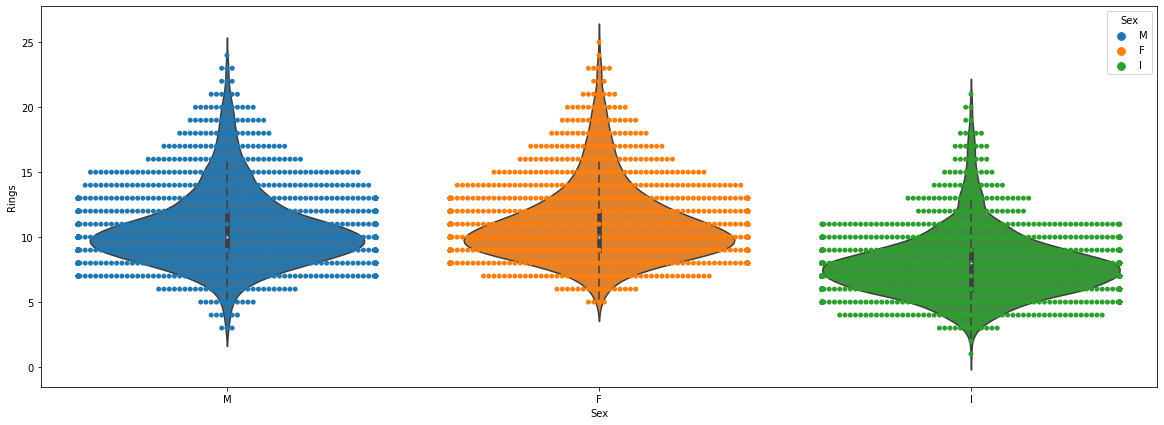

In [ ]:
#plot
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = datafile, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = datafile)

### (8). Split the data into dependent and independent variables.

In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)
x = datafile.drop(['Rings','Sex'], axis = 1)
y = datafile['Rings']

print(x.shape)
print(y.shape)

print(x.columns)

(4163, 7)
(4163,)
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


### (9). Scale the independent variables

In [ ]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

standardScale = StandardScaler()
standardScale.fit_transform(x)


array([[-0.57099935, -0.42791461, -1.06245142, ..., -0.60787921,
        -0.72701446, -0.63732941],
       [-1.44850169, -1.43987731, -1.18241955, ..., -1.18045642,
        -1.21243962, -1.22001299],
       [ 0.05578804,  0.12866487, -0.10270633, ..., -0.46129945,
        -0.35254361, -0.20031673],
       ...,
       [ 0.64078961,  0.68524435,  1.57684758, ...,  0.77088671,
         0.99740065,  0.51347066],
       [ 0.84971874,  0.78644062,  0.25719808, ...,  0.7960801 ,
         0.75237652,  0.42606812],
       [ 1.56007778,  1.49481451,  1.33691131, ...,  2.69474613,
         1.82031189,  1.87549352]])

### (10). Split the data into training and testing

In [ ]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3122, 7)
(3122,)
(1041, 7)
(1041,)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### (11). Build the Model

In [ ]:
x_train.to_csv("abalone-train.csv",index = False)
x_test.to_csv("abalone-test.csv",index = False)

In [ ]:
corr = datafile.corr(method = 'pearson')
print(corr['Rings'])

Length            0.559028
Diameter          0.576238
Height            0.558202
Whole weight      0.541056
Shucked weight    0.422096
Viscera weight    0.506249
Shell weight      0.626835
Rings             1.000000
Name: Rings, dtype: float64


### Linear Regression
###### Function for simple linear (straight-line) regression model to predict rings

In [ ]:
def linear_fit(data):
    regressor = LinearRegression()
    shell_weight = np.array(data['Shell weight'])
    shell_weight = shell_weight.reshape(-1,1)
    Rings = np.array(data['Rings'])
    Rings = Rings.reshape(-1,1)
    regressor.fit(shell_weight, Rings)
    y_pred = regressor.predict(shell_weight)
    return y_pred

In [ ]:
from math import sqrt
[x_train, x_test] =train_test_split(datafile, test_size=0.30, random_state=42, shuffle = True)
error_train = sqrt(mean_squared_error(x_train['Rings'], linear_fit(x_train))) #computing the error in train data
error_test = sqrt(mean_squared_error(x_test['Rings'],linear_fit(x_test)))#computing the error in test data
print("RMSE Error for Linear Regression, Train data is : %.2f"%(error_train))
print("RMSE Error for Linear Regression, Test data is : %.2f"%(error_test))

RMSE Error for Linear Regression, Train data is : 2.45
RMSE Error for Linear Regression, Test data is : 2.52


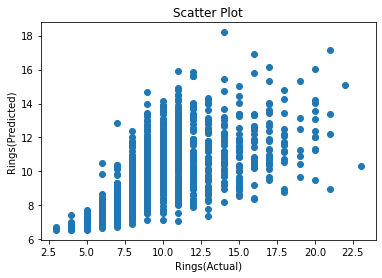

In [ ]:
plt.title("Scatter Plot") 
plt.xlabel("Rings(Actual)")
plt.ylabel("Rings(Predicted)")
plt.scatter(x_test['Rings'], linear_fit(x_test))
plt.show()

In [ ]:
x_train.Sex = x_train.Sex.replace({"M":1, "I":0, "F":-1})
x_test.Sex = x_test.Sex.replace({"M":1, "I":0, "F":-1})

In [ ]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [ ]:
Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156

SyntaxError: ignored

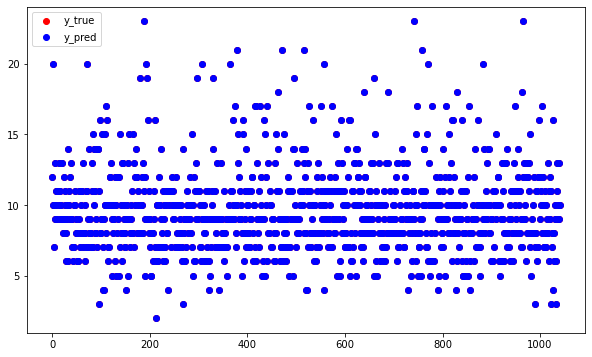

In [ ]:

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_test, color='blue', label='y_pred')
plt.legend()
plt.show()

## Thankyou...!